<a href="https://colab.research.google.com/github/nhphan/IE261_House-Prices/blob/main/IE261_house_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #2
- Fill in the blank cells below.
- Submit this notebook file on KLMS
  - The file must include:
    - Code to get your best model.
    - Captured images of your final exam score and ranking (insert the image into the proper cell that has instruction like "attach it into the next cell")

## Predict  sales prices
- __Task 0__. Preliminary of assignment #2
<br>
- __Task 1__. Basic Linear regression    
    * Categorical Variable encoding
    * Remove columns with missing values
    * Linear regression and submit the result
- __Task 2__. Imputation    
    * Remove columns with missing values more than 20%
    * Fill in remaining missing values
- __Task 3__. Linear regression with Regularization
    * Lasso
    * Ridge
- __Task 4__. EDA
    * Eyeballing on data
- __Task 5__. Feature engieering
    * Cardinal * Ordinal interaction
    * Caridnal * Nominal interaction
    * submit your best model
- __Task 6__. Develope your best model (Optional, but bonus point)

### Task 0. Preliminary

1.  Create your own Kaggle Account
    * https://www.kaggle.com
2.  Competition : House Prices - Advanced Regression Techniques
    * https://www.kaggle.com/c/house-prices-advanced-regression-techniques
    * This kaggle competition is to predict house price of Boston area.
3. Look-around the competition page
    * Code : useful sample codes
        * Baseline, Pipeline, EDA (Exploratary Data Analysis), ...
    * Leaderboard
    * Discussions
    * Rules
    * Tutorials

4. Data download
    * download data from `data` section of the competition
    * train.csv : data available for model developing
        - 81 columns, 1460 house records with label (SalePrice)
            * first column : row id
            * last column : label ('SalePrice')
            * 79 features
        - need to split into train & validation data
            - train data : to train model parameters
            - val. data : to select model and hyper-parameters, to check performance
    * test.csv : __exam data__
        - 80 columns (no label), 1459 house records w/o label
        - you are supposed to fill in label (SalePrice) column by your prediction model
        - and submit it to kaggle to see your exam score and ranking in the leaderboard
    * Features : total 79 features available
        - Numeric
            * Cardinal: GrLivArea etc.
            * Ordinal: OverallQual etc. (1,2,...,10)
        - Categorical (Nominal): MSZoning etc.
        - Refer to `data_description.txt` in details
        - Note that there are many __missing values__

5. Evaluation measure
  * evaluation measure used in this competition : RMSE of log-price
  * use log of 'SalePrice' column as label
    * $p_i$ : SalePrice of data i
    * $y_i = \log p_i$ : label for data i (log price)
      * fit your model using MSE loss on log price
    * $\hat{y}_i$ : predicted log price
    * $\hat{p}_i = e^{\hat{y}_i}$ : Predicted price to be reported
  * similar effect as MAPE measure
    * $p = 10000, \hat{p} = 11000$ : 10% prediction error
      * $(p-\hat{p})^2 = (11000-10000)^2 = 1000^2 = 10^6$
      * $(\log_{10} p-\log_{10}\hat{p})^2 = (4.04139-4)^2 = 0.00171$
    * $p = 100000, \hat{p} = 110000$ : 10% prediction error
      * $(p-\hat{p})^2 = (110000-100000)^2 = 10000^2 = 10^8$
      * $(\log_{10} p-\log_{10}\hat{p})^2 = (5.04139-5)^2 = 0.00171$
      
$ $


### Task 1. Basic Linear regression  
- Let's try a 'quick' solution first.
- However, standard linear regression will not work:
    - missing values
    - categorical features
- Let's do minimal pre-processing and try linear regression in task 1.
- All the code for this task are provided to understand the basic approach including data loading, data preprocessing, model training, and evaluation.

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings(action='ignore')

#### Task 1-1. Read data
- read 'train.csv' : pd.read_csv('train.csv', index_col=0)
     - make feature matrix (X_all) : do not include 'Id' column and 'SalePrice' column
     - make label vector (Y_all) : log-price of 'SalePrice' column
- read 'test.csv' and make feature matrix (X_exam)
- check data : pd.read_csv('test.csv', index_col=0)
    - X_all.head() : show first 5 rows of X_all
    - X_all.info() : show columns and their data types, missing values, ...

In [ ]:
# Download train.csv and test.csv

# train.csv => save path: /content/train.csv
!gdown https://drive.google.com/uc?id=1NPUSiudQHEBRjq5UCMcQYb3bTKKxpc5b
# test.csv => save path: /content/test.csv
!gdown https://drive.google.com/uc?id=1NpYI7aSzrh2a43OAf2n_JsIFmaESF8WB
# for submission
!gdown https://drive.google.com/uc?id=1NUVjJ5mmih_cvctMgCYt420_vRXRCzt3

Downloading...
From: https://drive.google.com/uc?id=1NPUSiudQHEBRjq5UCMcQYb3bTKKxpc5b
To: /content/train.csv
100% 461k/461k [00:00<00:00, 69.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NpYI7aSzrh2a43OAf2n_JsIFmaESF8WB
To: /content/test.csv
100% 451k/451k [00:00<00:00, 96.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NUVjJ5mmih_cvctMgCYt420_vRXRCzt3
To: /content/sample_submission.csv
100% 31.9k/31.9k [00:00<00:00, 59.4MB/s]


In [ ]:
# Task 1-1. data read and preprocessing

XY_all = pd.read_csv('/content/train.csv', index_col=0, na_values=["NA"], keep_default_na=False)

Y_all = np.log(XY_all['SalePrice'])
X_all = XY_all.drop('SalePrice', axis=1)

X_exam = pd.read_csv('/content/test.csv', index_col=0)

#### Task 1-2. Basic preprocessing
- X_all.info() shows that there are many columns with missing values
    - as a simples way to handle missing values, let's remove columns with missing values
        * use df.dropna(axis=1) : this will remove columns with any missiing values
    - note that some important information is thrown away
        * we will recover this later
- X_all contains categorical variables
    - introduce one-hot binary variables (dummy variables)
    - method 1 : use pd.get_dummies(X_all)
    - method 2 : sklearn.preprocessing.OneHotEncoder
    
- Apply the aboves to X_exam data?
    - applying dropna and get_dummies to train data and exam data independently will result in different column sets
        * X_all.dropna(axis=1) $\to$ 60 columns remaning
        * X_exam.dropna(axis=1) $\to$ 46 columns remaning
        * If we drop all columns with NaN in either X_all or X_exam : only 45 columns will remain
    - concatenate X_all and X_exam, then apply dropna and get_dummies, then split
        * concat : df = pd.concat([df1, df2], axis=0) $\to$ vertically stack df1 and df2
        * split : df1 = df.iloc[:1000, :] $\to$ get first 1000 rows of df
            * use split_train_exam() function

In [ ]:
def split_train_exam(X_combined, n):
    X_task = X_combined.iloc[:n,:]
    X_exam = X_combined.iloc[n:,:]
    return X_task, X_exam

In [ ]:
ordinal_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0, np.nan:0}

def ordinal_int_encoding(X, ord_cols):
    for c in ord_cols:
        if c not in X.columns:
            continue
        X[c] = X[c].map(ordinal_map)
        X.rename(columns = {c : f'{c}_num'}, inplace = True)
    return X

ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
           'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

In [ ]:
# outputs
#   X_task1 : feature matrix for task 1  (this matches with Y_all)
#   X_exam1 : exam set for task 1

X_combined = pd.concat([X_all, X_exam], axis=0)
print ("Raw", X_combined.shape)

X_combined = X_combined.dropna(axis=1, how='any')
print ("After dropping NaN", X_combined.shape)

X_combined = ordinal_int_encoding(X_combined, ord_cols)
print ("After ordinal encoding", X_combined.shape)

cat_cols = X_combined.select_dtypes(include='object').columns.tolist()
# print(cat_cols)
print (f"catrgorical columns = {len(cat_cols)}")

X_combined = pd.get_dummies(X_combined)
print ("After categorical encoding", X_combined.shape)

X_task1, X_exam1 = split_train_exam(X_combined, X_all.shape[0])
print("After split", X_task1.shape, X_exam1.shape)

Raw (2919, 79)
After dropping NaN (2919, 45)
After ordinal encoding (2919, 45)
catrgorical columns = 17
After categorical encoding (2919, 138)
After split (1460, 138) (1459, 138)


#### Task 1-3. The $1^{st}$ attempt
- Let's try linear regression using the data from task 1-2
    * use `LinearRegression`
    * model fitting and check performance : use model_fit_perf()
        * split train_test_split()
        * fit to training data (X_trn1, Y_trn1)
        * compute & print model performance with training data (X_trn1, Y_trn1)
            * `sklearn.metrics.r2_score`
            * `sklearn.metrics.mean_squared_error`
        * compute & print model performance with validation data (X_val1, Y_val1)
            * use model_perf()
        * cross validation score with all data (X_task1, Y_all)
            * use cross_val_perf()
- Expected result is as below:  (numbers may be slightly different. why?)
    * LinearRegression Training   R^2 score = 0.916, RMSE = 0.1175
    * LinearRegression Validation R^2 score = 0.856, RMSE = 0.1438
    * LinearRegression Cross val. R^2 score mean = 0.844, std = 0.078

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

# function to compute R^2 & RMSE and print them
# prefix : string to be printed at the front of a line
def model_perf(model, X, Y, prefix=''):
    Yhat = model.predict(X)
    r2 = r2_score(Y, Yhat)
    rmse = mean_squared_error(Y, Yhat, squared=False)
    print (f'{prefix} R^2 score = {r2:.3f}, RMSE = {rmse:.4f}')


def model_fit_perf(model, X_all, Y_all, prefix=''):
    X_trn, X_val, Y_trn, Y_val = train_test_split(X_all, Y_all, test_size=0.2, random_state=4)
    model.fit(X_trn, Y_trn)
    model_perf(model, X_trn, Y_trn, f'{prefix} Training  ')
    model_perf(model, X_val, Y_val, f'{prefix} Validation')
    s = cross_val_score(model, X_all, Y_all, cv=10)
    print (f'{prefix} Cross val. R^2 score mean = {s.mean():.3f}, std = {s.std():.3f}')

In [ ]:
# make a model, fit, training performance, val. performance, cross val performance
model = LinearRegression()
model_fit_perf(model, X_task1, Y_all, "LinearRegression")

LinearRegression Training   R^2 score = 0.913, RMSE = 0.1191
LinearRegression Validation R^2 score = 0.866, RMSE = 0.1385
LinearRegression Cross val. R^2 score mean = 0.845, std = 0.078


In [ ]:
# Task 1-4.

model.fit(X_task1, Y_all)
Yhat_exam = model.predict(X_exam1)
price_exam = np.exp(Yhat_exam)
sub = pd.read_csv('/content/sample_submission.csv', index_col=0)
sub['SalePrice'] = price_exam
sub.to_csv('/content/mysub.csv')

#### Task 1-4. Let's submit your $1^{st}$ attempt
- Predict price for exam data using the trained model
    * note that your prediction will give log-price
    * so, take `np.exp()` to get price
- Read 'sample_submission.csv' file
- Replace 'SalePrice' column with your prediction price
- Write to 'mysub.csv' file
- Submit your result to kaggle
    * You can download the file from the left tab of Colab; goto the folder and click the file and download.
    * Leaderboard tab $\to$ `Submit predictions` button
    * step 1 : drag and drop your 'mysub.csv' file
    * step 2 : describe your submission $\to$ write something here like "my professor is the best"
    * click `make submission` button $\to$ you will get your exam score
    * 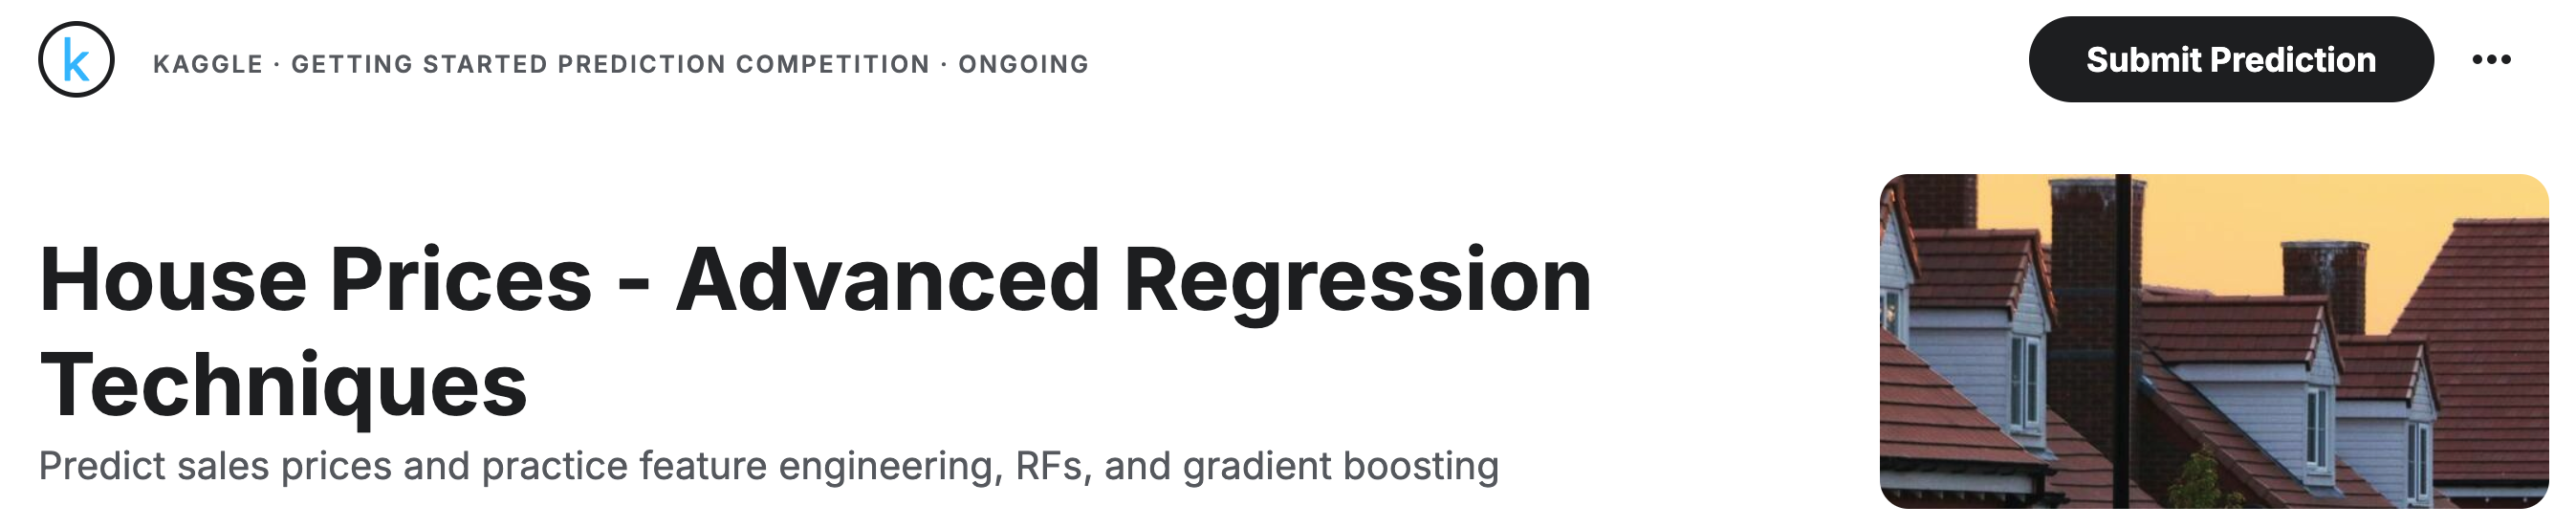
    * by clicking "jump to your position on the leaderboard", you can check your ranking
- **Capture your ranking and attach/replace it in the next cell**

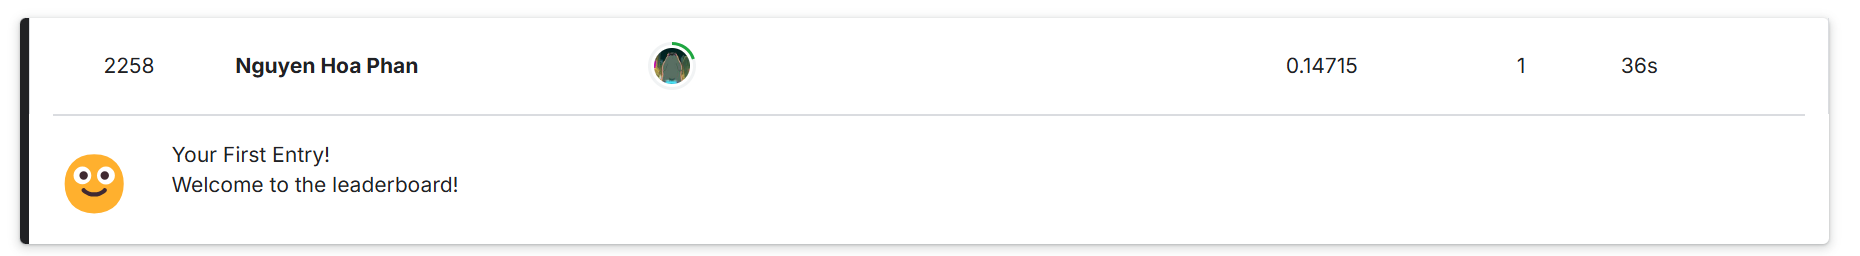

#### Task 2-1. Remove columns with many missing values (> 20%)
* vertically combine X_all and X_exam as X_combined
    - use pd.concat
* select columns with missing values portion larger than na_ratio=0.2
    - use keep_columns(X_all, X_exam, na_ratio)
    - which keeps columns with missing value portion <= na_ratio
* save as X_combined

Instruction:

(1) Print the shape of dataframes before and after removing colums with missing values more than 20%

In [ ]:
# this function keep columns with missing values less than na_ratio
def keep_columns(X_combined, na_ratio=0):
    X_null = X_combined.isnull().sum(axis=0)
    max_na = X_combined.shape[0] * na_ratio
    col = [c for c in X_combined.columns if X_null[c] <= max_na]
    return X_combined[col]

In [ ]:
# Task 2-1 : remove columns with missing values more than 20%
# Result:
# Raw (2919, 79)
# After dropping columns with many missing values (2919, 73)
# fill in this cell
#X_all: get from train.csv, except the saleprice column
#Y_all: log of the saleprice in train.csv
#X_exam: get from test.csv

X_combined = pd.concat([X_all, X_exam], axis = 0)
print('Raw', X_combined.shape)

X_combined = keep_columns(X_combined, na_ratio=0.2)
print('After dropping columns with many missing values', X_combined.shape)

Raw (2919, 79)
After dropping columns with many missing values (2919, 73)


#### Task 2-2. select column names with numeric type and categorical type
* num_cols : numeric column name list, use X_combined.select_dtypes(include = np.number)
* cat_cols : categorical column name list, use X_combined.select_dtypes(include = 'object')

Instruction:

(1) Select the numeric colums and categorical columns

(2) Print the number of numeric columns and categorical columns

In [ ]:
# Task 2-2 : select column names with numeric type and categorical type
#Result: numeric columns = 36, string columns = 37
# fill in this cell
num_cols = X_combined.select_dtypes(include = np.number).columns.tolist()
cat_cols = X_combined.select_dtypes(include = 'object').columns.tolist()
print(f'numeric columns = {len(num_cols)}, string columns = {len(cat_cols)}')

numeric columns = 36, string columns = 37


#### Task 2-3. imputation
- imputation : fill missing values using `sklearn.impute.SimpleImputer`
- make imputers
    * for numeric columns (num_cols) : fill with mean value of the column
        - num_imputer = SimpleImputer(strategy='mean')
    * for caterigorical columns (cat_cols) : fill with most frequent category in the column
        - cat_imputer = SimpleImputer(strategy='most_frequent')
- apply imputers to X_combined
    * apply num_imputer.fit_transform() to X_combined[num_cols]
        * and save result to X_combined[num_cols]

Instruction:

(1) Prints the results (X_combined) after applying num_imputer and cat_imputer

(2) Checks the number of missing (null) values in X_combined; print the number (it should be '0')


In [ ]:
# Task 2-3 : make imputers and apply
from sklearn.impute import SimpleImputer
# fill in this cell
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_combined[num_cols] = num_imputer.fit_transform(X_combined[num_cols])
X_combined[cat_cols] = cat_imputer.fit_transform(X_combined[cat_cols])

print(X_combined)
print(X_combined.isnull().sum().sum())

      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
1           60.0       RL         65.0   8450.0   Pave      Reg         Lvl   
2           20.0       RL         80.0   9600.0   Pave      Reg         Lvl   
3           60.0       RL         68.0  11250.0   Pave      IR1         Lvl   
4           70.0       RL         60.0   9550.0   Pave      IR1         Lvl   
5           60.0       RL         84.0  14260.0   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
2915       160.0       RM         21.0   1936.0   Pave      Reg         Lvl   
2916       160.0       RM         21.0   1894.0   Pave      Reg         Lvl   
2917        20.0       RL        160.0  20000.0   Pave      Reg         Lvl   
2918        85.0       RL         62.0  10441.0   Pave      Reg         Lvl   
2919        60.0       RL         74.0   9627.0   Pa

#### Task 2-4. dummy variables for categorical features
- convert categorical variables as one-hot binary (dummy) variables
    - use `pd.get_dummies`
- split X_combined into X_task2 and X_exam2
    - use split_train_exam

Instruction:

(1) Print the original shape of X_combine

(2) Print the shape after applying .get_dummies

(3) Split X_combined into X_task2 and X_exam2 and print their shapes

In [ ]:
# Task 2-4 : dummy variables for categorical features
# Result:
# original shape: (2919, 73)
# after pd.get_dummies: (2919, 266)
# train shape: (1460, 266) exam shape: (1459, 266)

# fill in this cell
print('original shape:', X_combined.shape)
X_combined = pd.get_dummies(X_combined)
print('after pd.get_dummies:', X_combined.shape)
X_task2, X_exam2 = split_train_exam(X_combined, X_all.shape[0])
print('train shape:', X_task2.shape, 'exam shape:', X_exam2.shape)


original shape: (2919, 73)
after pd.get_dummies: (2919, 266)
train shape: (1460, 266) exam shape: (1459, 266)


#### Task 2-5. LinearRegression on imputed data
- apply LinearRegression
- fit model and check performance
    - use model_fit_perf()
        - data split into training and validation
        - fit model to training data
        - check training scores : use model_perf()
        - check validation scores : use model_perf()
        - cross validation performace

Instruction:

(1) Fit the linear regression model on imputed data above

(2) Check the performance using model_fit_perf()

In [ ]:
# Task 2-5 : LinearRegression model fitting and check performance
# Result:
# LinearRegression  Training   R^2 score = 0.947, RMSE = 0.0927
# LinearRegression  Validation R^2 score = 0.856, RMSE = 0.1437
# LinearRegression  Cross val. R^2 score mean = -1352993.790, std = 3250642.669

# fill in this cell
model = LinearRegression()
model_fit_perf(model, X_task2, Y_all, "LinearRegression")

LinearRegression Training   R^2 score = 0.947, RMSE = 0.0927
LinearRegression Validation R^2 score = 0.856, RMSE = 0.1437
LinearRegression Cross val. R^2 score mean = -1352993.790, std = 3250642.669


#### Task 2-6. Is validation score (after imputation) better than Task 1-3?
- If yes, please submit your result to Kaggle
    * same as in Task 1-4.
    * include your exam score and ranking screen shot here
- If not, discuss why. (write your opinion here)
    * The validation score after imputation is not better than task 1-3. I think that the imputation procedure filled the missing values in a way that doesn't capture the true variation in the dataset.



---



### Task 3. Regularization
- In this task, let's try L1, L2 regularization to avoid overfitting
    - Lasso
    - Ridge
    - ElasticNet

#### Task 3-1. Lasso
- Add L1 regularization
    * use Lasso
    * with default hyper-parameter alpha = 1
- fit & check performance
    * use model_fit_perf
- print the number of zeros and non-zeros in model.coef_
- sample output
    * Lasso Training   R^2 score = 0.732, RMSE = 0.2091
    * Lasso Validation R^2 score = 0.792, RMSE = 0.1730
    * Lasso Cross val. R^2 score mean = 0.724, std = 0.122
    * \# of zero coefficients = 258, \# of non-zeros = 12

Instruction:

(1) Fit the Lasso regression model on imputed data above

(2) Check the performance using model_fit_perf()

In [ ]:
# Task 3-1 : Lasso model fitting and check performance
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# fill in this cell

model = Lasso(alpha=1)
model_fit_perf(model, X_task2, Y_all, "Lasso")
print('# of zero coefficients =', np.sum(model.coef_ == 0), ', # of non-zeros =', np.sum(model.coef_ != 0))

Lasso Training   R^2 score = 0.760, RMSE = 0.1981
Lasso Validation R^2 score = 0.807, RMSE = 0.1667
Lasso Cross val. R^2 score mean = 0.738, std = 0.187
# of zero coefficients = 254 , # of non-zeros = 12


#### Task 3-2. Ridge
- Add L2 regularization
    * use Ridge
    * with default hyper-parameter alpha = 1
- do the same thing as in Task 2-1
    * fit & check performance : use model_fit_perf
    * print the number of zeros and non-zeros in model.coef_

Instruction:

(1) Fit the Ridge regression model on imputed data above

(2) Check the performance using model_fit_perf()

In [ ]:
# Task 3-2 : Ridge model fitting and check performance

# fill in this cell
model = Ridge(alpha=1)
model_fit_perf(model, X_task2, Y_all, "Ridge")
print(f'# of zero coefficients = {np.sum(model.coef_ == 0)}, # of non-zeros = {np.sum(model.coef_ != 0)}')

Ridge Training   R^2 score = 0.938, RMSE = 0.1008
Ridge Validation R^2 score = 0.885, RMSE = 0.1283
Ridge Cross val. R^2 score mean = 0.868, std = 0.087
# of zero coefficients = 3, # of non-zeros = 263


#### Task 3-3. ElasticNet
- Add L1+L2 regularization
    * use ElasticNet
    * with default hyper-parameter alpha = 1
- do the same thing as in Task 2-1
    * fit & check performance : use model_fit_perf
    * print the number of zeros and non-zeros in model.coef_

Instruction:

(1) Fit the ElasticNet regression model on imputed data above

(2) Check the performance using model_fit_perf()

In [ ]:
# Task 3-3 : ElasticNet model fitting and check performance

# fill in this cell
model = ElasticNet(alpha=1)
model_fit_perf(model, X_task2, Y_all, "ElasticNet")
print(f'# of zero coefficients = {np.sum(model.coef_ == 0)}, # of non-zeros = {np.sum(model.coef_ != 0)}')

ElasticNet Training   R^2 score = 0.780, RMSE = 0.1895
ElasticNet Validation R^2 score = 0.821, RMSE = 0.1602
ElasticNet Cross val. R^2 score mean = 0.757, std = 0.176
# of zero coefficients = 251, # of non-zeros = 15


#### Task 3-4. Briefly compare results from Lasso, Ridge, ElasticNet
- Characteristics of Lasso: Performs feature selection by setting many coefficients to zero. May lose predictive power when many features are zeroed out.
- Characteristics of Ridge: Retains all features and handles multicollinearity well. Does not perform feature selection; all coefficients remain non-zero.
- Characteristics of ElasticNet: Balances feature selection and coefficient shrinkage. Complexity in tuning due to dual regularization terms (L1 and L2).

- We will optimize alpha hyper-parameter later.



---



### Task 4. EDA (Exploratory Data Analysis)
- Eyeballing on data
- Grab some hints for feature engineering

#### Task 4-1. High correlation with SalePrice
- read 'train.csv' as XY_all
- Compute correlation between columns of XY_all
    * use XY_all.corr()
    * sort in decreasing order or correlation with SalePrice
    * print result
- Select 6 most highly correlated features with SalePrice
    * store column names to `high_corr_cols`
    * print(high_corr_cols)
- Expected output:
    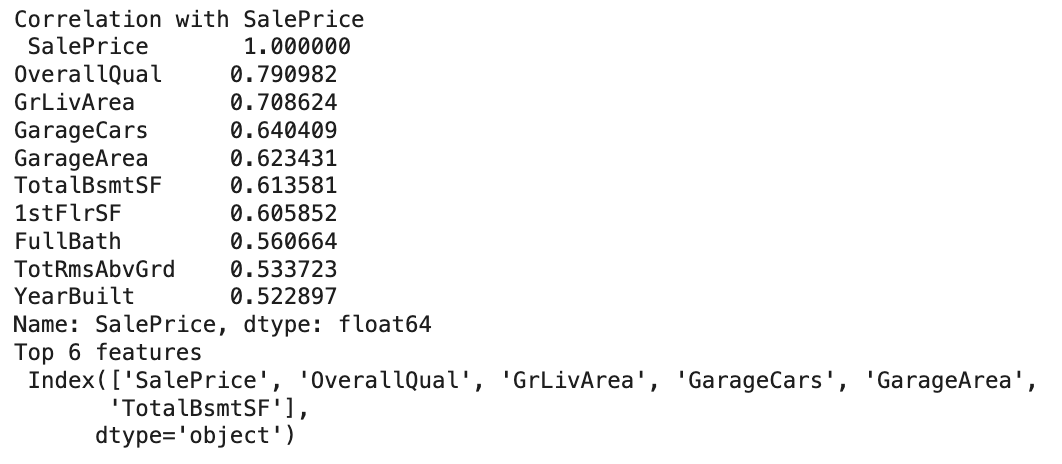

In [ ]:
# Task 4-1 : correlation analysis

XY_all = pd.read_csv('/content/train.csv', index_col=0)

numeric_XY_all = XY_all.select_dtypes(include=[np.number])

# fill in this cell

correlations = numeric_XY_all.corr()['SalePrice'].sort_values(ascending=False)
print('Correlation with SalePrice')
print(correlations[:10])
high_corr_cols = correlations.index[:6]
print('Top 6 features')
print(high_corr_cols)

Correlation with SalePrice
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
Top 6 features
Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF'],
      dtype='object')


#### Task 4-2. Scatter matrix of highly correlated features
- show scatter matrix using `pandas.plotting.scatter_matrix`
- as shown below

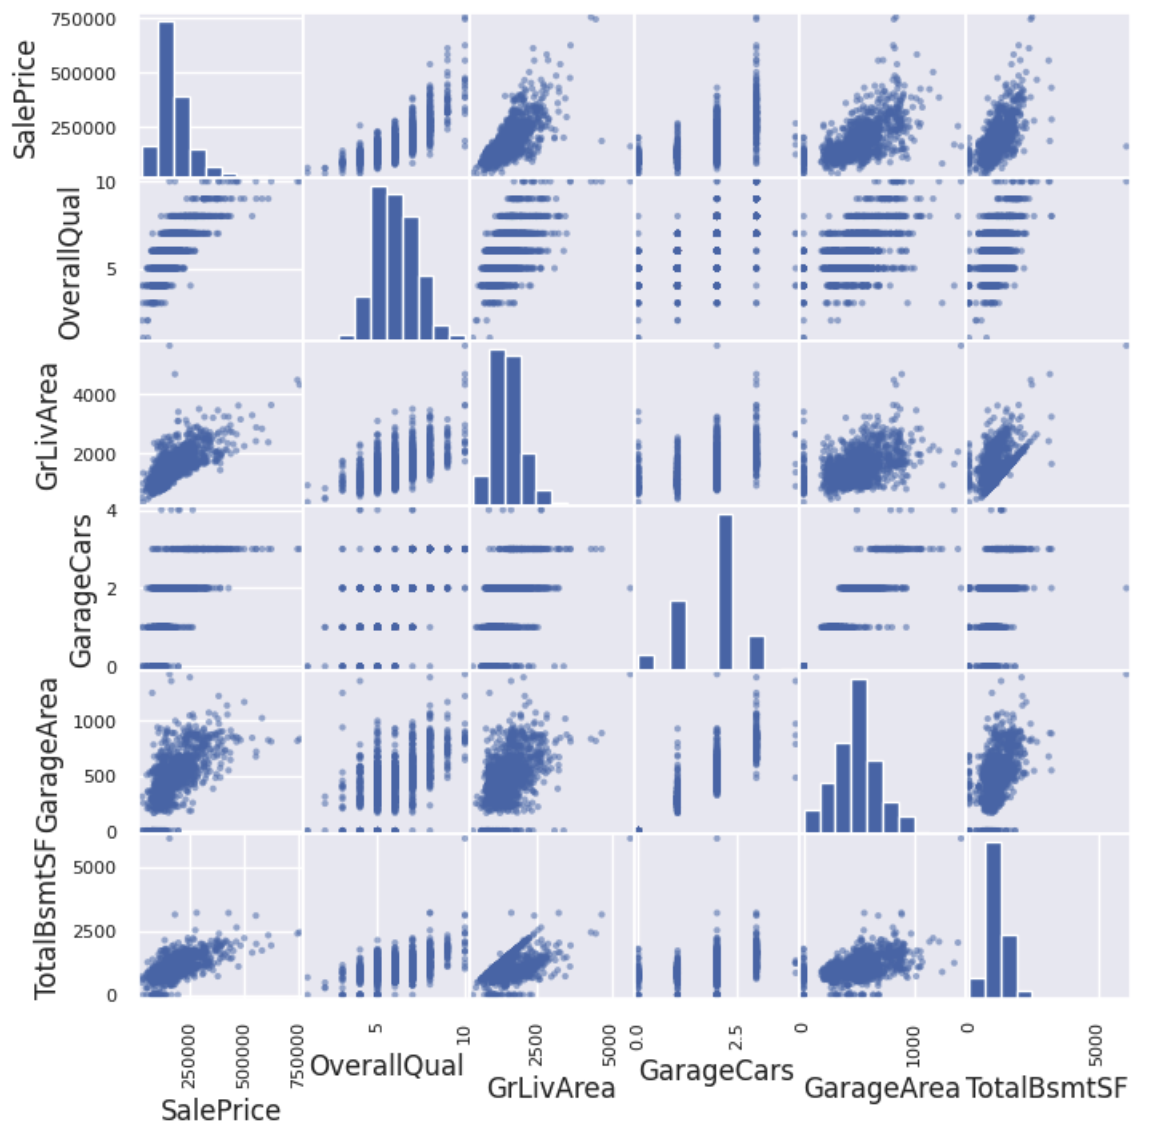

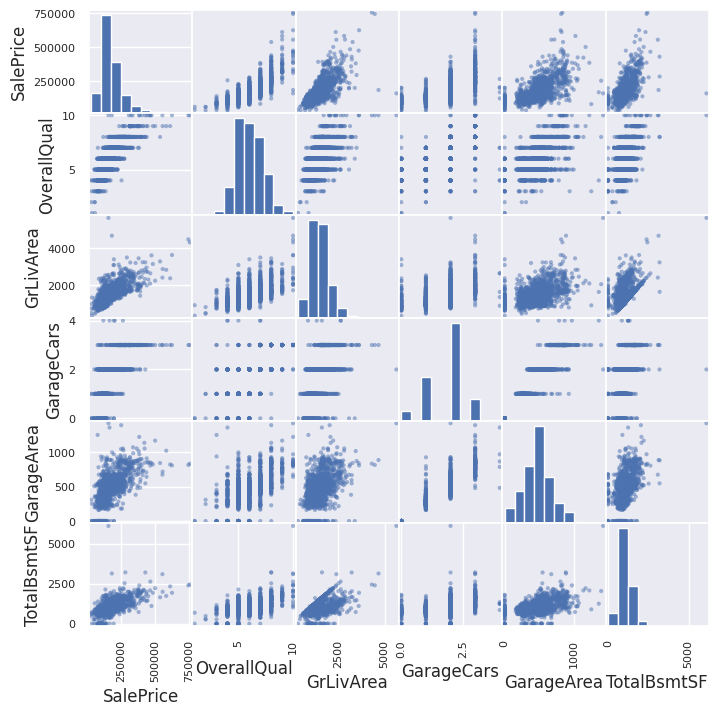

In [ ]:
from pandas.plotting import scatter_matrix
# Task 4-2 : scatter matrix

# fill in this cell
top_features_data = numeric_XY_all[high_corr_cols]
scatter_matrix(top_features_data, figsize=(8,8));



---



### Task 5. Feature engineering and hyper-parameter tuning
- On top of model and data obtained so far
    * model : Ridge() will be used
    * data : removing some columns, imputation, one-hot encoding
- Add more feature to improve your model
    * interaction terms : product features
- Tuning hyper-parameter

#### Task 5-1. Interaction between GrLivArea, OverallQual
- We saw that `OverallQual` and `GrLivArea` have high correlation with SalePrice values.
    - OverallQual : overall quality score 1~10
    - GrLivArea : Ground livingroom area
- The effect of `OverallQual` and `GrLivArea` may not be additive
    * add a new feature = `OverallQual` * `GrLivArea` to the X_combined
        * an interaction feature
    * split X_combined to X_task_new, X_exam_new by:
      * X_task_new, X_exam_new = split_train_exam(X_combined, X_all.shape[0])
    * fit Ridge model and check performance
        * use model_fit_perf()
- You may add your own interaction features if you want


In [ ]:
# Task 5-1 : interaction feature

# fill in this cell
X_combined['OverallQual_GrLivArea'] = X_combined['OverallQual'] * X_combined['GrLivArea']
X_task_new, X_exam_new = split_train_exam(X_combined, X_all.shape[0])
model = Ridge(alpha=1)
model_fit_perf(model, X_task_new, Y_all, 'Ridge')

Ridge Training   R^2 score = 0.941, RMSE = 0.0985
Ridge Validation R^2 score = 0.893, RMSE = 0.1241
Ridge Cross val. R^2 score mean = 0.879, std = 0.065


#### Task 5-2. Grid Search to find best hyperparameter alpha
- As the final task, let's fine tune hyper-parameter alpha
- Ridge regression : penalize large $\mathbf{w}$ to avoid overfitting
    * min $ L(\textbf{w}) = (Y-X\mathbf{w})^2 + \alpha\mathbf{w}^2$
- How to choose $\alpha$?
    * use GridSearchCV
    * search $\alpha \in \{0, 0.5, 1, 1.5, ..., 20\}$
- fit `best_model` using $\alpha$ from the grid search result
    * model_fit_perf()
- use the X_task_new as training set.

In [ ]:
# Task 5-2. fill in this code cell
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

# fill in this cell
param_grid = {'alpha' : [i*0.5 for i in range(41)]}
# print(param_grid)
grid_search = GridSearchCV(ridge, param_grid, scoring='r2')
grid_search.fit(X_task_new, Y_all)
print('Best alpha:', grid_search.best_params_['alpha'])
print('Best R2 score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
model_fit_perf(best_model, X_task_new, Y_all, 'Best Ridge')
model_fit_perf(ridge, X_task_new, Y_all, 'Default Ridge')

Best alpha: 9.0
Best R2 score: 0.8821348288073935
Best Ridge Training   R^2 score = 0.927, RMSE = 0.1093
Best Ridge Validation R^2 score = 0.908, RMSE = 0.1151
Best Ridge Cross val. R^2 score mean = 0.884, std = 0.065
Default Ridge Training   R^2 score = 0.941, RMSE = 0.0985
Default Ridge Validation R^2 score = 0.893, RMSE = 0.1241
Default Ridge Cross val. R^2 score mean = 0.879, std = 0.065


#### Task 5-3. Submit the best model result
- Y_exam = best_model.pridict(X_exam_new)
- Submit prediction result on exam data (X_exam_new) as in Task 1-4.
- Capture your exam score and ranking here.


Since the best model was trained on the data after adding the interaction feature,

your best model should be evaluated on X_exam_new data

(the valudation/test data should have the same feature set)

In [ ]:
Yhat_exam = best_model.predict(X_exam_new)
price_exam = np.exp(Yhat_exam)
sub = pd.read_csv('/content/sample_submission.csv', index_col=0)
sub['SalePrice'] = price_exam
sub.to_csv('/content/mysub2.csv')



---



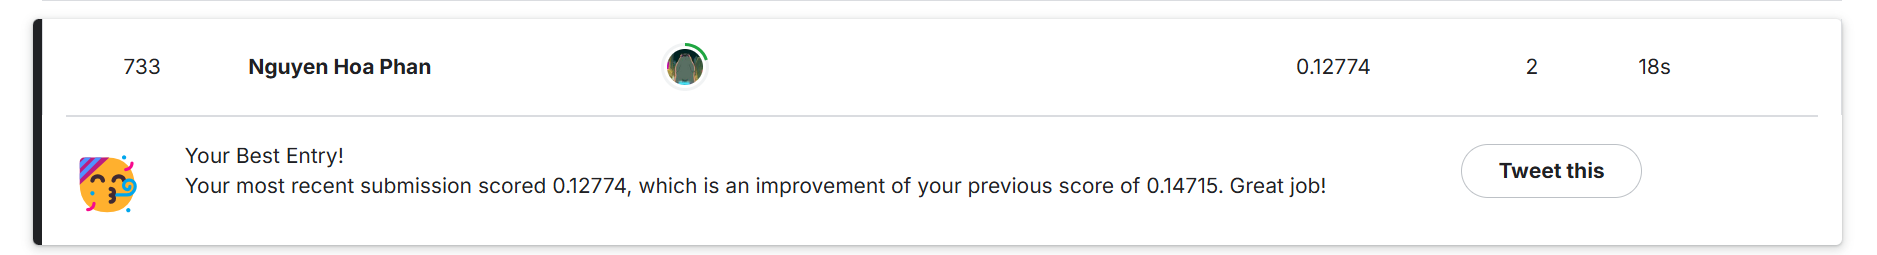



---



### Task 6. Develope your best model
- This is an optional task you can do or not. You can further improve your model's performance using other techniques, but the model should be linear regression (multiple, polynomial regression). You can do more data engineering and adding features, etc. Try to achieve the best score in our class!
- Provide your code to get the model, and capture the score and ranking from Kaggle. Depending on the rank, you will get some bonus points.


In [ ]:
X_combined['OverallQual__GrLivArea'] = X_combined['OverallQual'] + X_combined['GrLivArea']
X_task_add, X_exam_add = split_train_exam(X_combined, X_all.shape[0])
ridge = Ridge()
param_grid = {'alpha' : [i*0.1 for i in range(200)]}
# print(param_grid)
# X_exam_add = X_task_new.drop(columns=['OverallQual_GrLivArea'])
grid_search = GridSearchCV(ridge, param_grid, scoring='r2')
grid_search.fit(X_task_add, Y_all)
print('Best alpha:', grid_search.best_params_['alpha'])
print('Best R2 score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
model_fit_perf(best_model, X_task_add, Y_all, 'Best Ridge')

Best alpha: 9.1
Best R2 score: 0.882259206867516
Best Ridge Training   R^2 score = 0.927, RMSE = 0.1094
Best Ridge Validation R^2 score = 0.908, RMSE = 0.1150
Best Ridge Cross val. R^2 score mean = 0.884, std = 0.065


In [ ]:
Yhat_exam = best_model.predict(X_exam_add)
price_exam = np.exp(Yhat_exam)
sub = pd.read_csv('/content/sample_submission.csv', index_col=0)
sub['SalePrice'] = price_exam
sub.to_csv('/content/mysub5.csv')

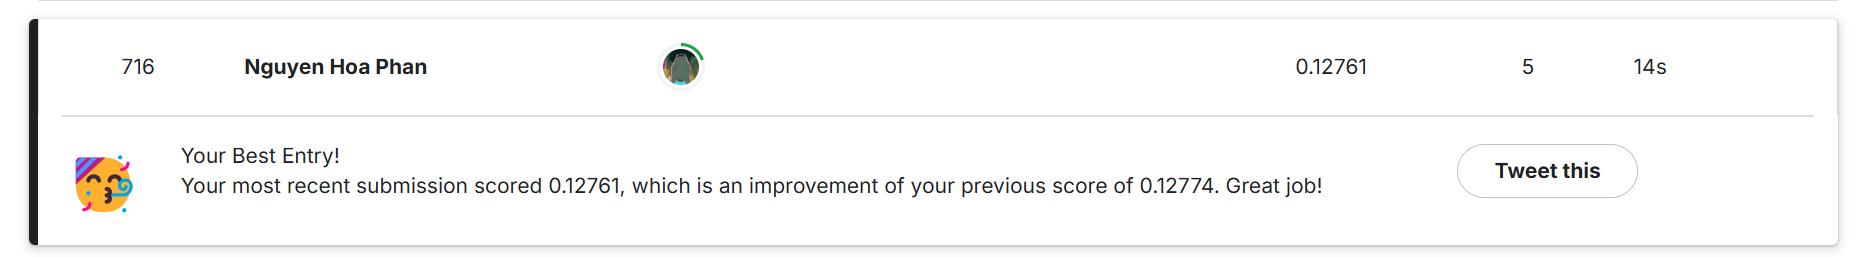

In [ ]:
X_combined['OverallQual_GarageCars'] = X_combined['OverallQual']*X_combined['GarageCars']
X_task_add, X_exam_add = split_train_exam(X_combined, X_all.shape[0])
ridge = Ridge()
param_grid = {'alpha' : [i*0.1 for i in range(200)]}
# print(param_grid)
# X_exam_add = X_task_new.drop(columns=['OverallQual_GrLivArea'])
grid_search = GridSearchCV(ridge, param_grid, scoring='r2')
grid_search.fit(X_task_add, Y_all)
print('Best alpha:', grid_search.best_params_['alpha'])
print('Best R2 score:', grid_search.best_score_)
best_model = grid_search.best_estimator_
model_fit_perf(best_model, X_task_add, Y_all, 'Best Ridge')

Best alpha: 9.4
Best R2 score: 0.8844488700234864
Best Ridge Training   R^2 score = 0.927, RMSE = 0.1092
Best Ridge Validation R^2 score = 0.911, RMSE = 0.1133
Best Ridge Cross val. R^2 score mean = 0.885, std = 0.061


In [ ]:
Yhat_exam = best_model.predict(X_exam_add)
price_exam = np.exp(Yhat_exam)
sub = pd.read_csv('/content/sample_submission.csv', index_col=0)
sub['SalePrice'] = price_exam
sub.to_csv('/content/mysub8.csv')

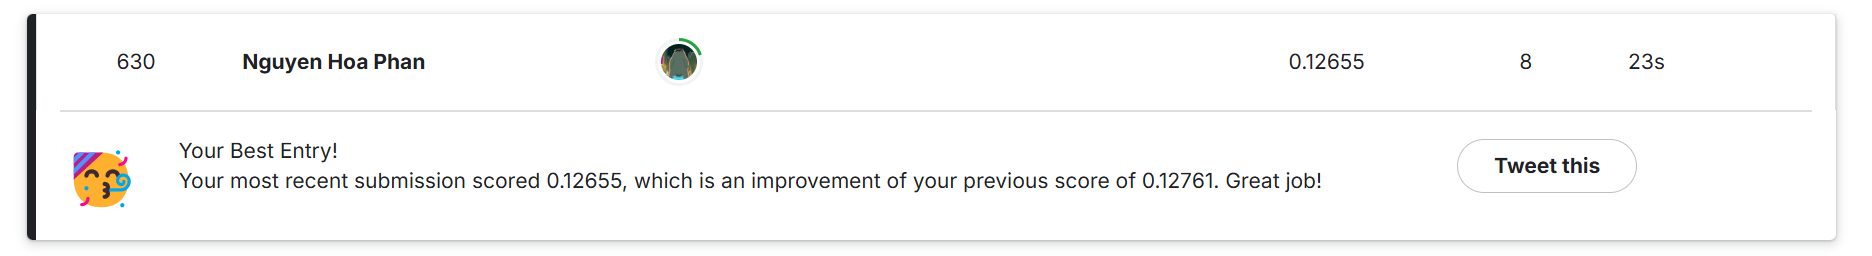

In [1]:
print(1)

1
